## Predict with rookie year stats if a player lasts 5 years in the NBA or not

In [ ]:
import pandas as pd
import numpy as np
import torch

In [29]:
ds = pd.read_csv("nba-players.csv",index_col=0)
ds

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


In [30]:
ds.head()

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [31]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1340 non-null   object 
 1   gp           1340 non-null   int64  
 2   min          1340 non-null   float64
 3   pts          1340 non-null   float64
 4   fgm          1340 non-null   float64
 5   fga          1340 non-null   float64
 6   fg           1340 non-null   float64
 7   3p_made      1340 non-null   float64
 8   3pa          1340 non-null   float64
 9   3p           1340 non-null   float64
 10  ftm          1340 non-null   float64
 11  fta          1340 non-null   float64
 12  ft           1340 non-null   float64
 13  oreb         1340 non-null   float64
 14  dreb         1340 non-null   float64
 15  reb          1340 non-null   float64
 16  ast          1340 non-null   float64
 17  stl          1340 non-null   float64
 18  blk          1340 non-null   float64
 19  tov        

In [32]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
gp,1340.0,60.414179,17.433992,11.0,47.000,63.00,77.0,82.0
min,1340.0,17.624627,8.307964,3.1,10.875,16.10,22.9,40.9
pts,1340.0,6.801493,4.357545,0.7,3.700,5.55,8.8,28.2
fgm,1340.0,2.629104,1.683555,0.3,1.400,2.10,3.4,10.2
fga,1340.0,5.885299,3.593488,0.8,3.300,4.80,7.5,19.8
fg,1340.0,44.169403,6.137679,23.8,40.200,44.10,47.9,73.7
3p_made,1340.0,0.247612,0.383688,0.0,0.000,0.10,0.4,2.3
3pa,1340.0,0.779179,1.061847,0.0,0.000,0.30,1.2,6.5
3p,1340.0,19.149627,16.051861,0.0,0.000,22.20,32.5,100.0
ftm,1340.0,1.297687,0.987246,0.0,0.600,1.00,1.6,7.7


In [33]:
ds.isnull().sum()

name           0
gp             0
min            0
pts            0
fgm            0
fga            0
fg             0
3p_made        0
3pa            0
3p             0
ftm            0
fta            0
ft             0
oreb           0
dreb           0
reb            0
ast            0
stl            0
blk            0
tov            0
target_5yrs    0
dtype: int64

Dropping duplicate rows

In [34]:
ds_unique = ds.drop_duplicates(subset='name')

In [35]:
ds_unique

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


In [36]:
print(ds_unique.head())
print(f"Original dataset size: {ds.shape[0]}")
print(f"Dataset size after removing duplicates: {ds_unique.shape[0]}")

              name  gp   min  pts  fgm  fga    fg  3p_made  3pa    3p  ...   
0   Brandon Ingram  36  27.4  7.4  2.6  7.6  34.7      0.5  2.1  25.0  ...  \
1  Andrew Harrison  35  26.9  7.2  2.0  6.7  29.6      0.7  2.8  23.5  ...   
2   JaKarr Sampson  74  15.3  5.2  2.0  4.7  42.2      0.4  1.7  24.4  ...   
3      Malik Sealy  58  11.6  5.7  2.3  5.5  42.6      0.1  0.5  22.6  ...   
4      Matt Geiger  48  11.5  4.5  1.6  3.0  52.4      0.0  0.1   0.0  ...   

   fta    ft  oreb  dreb  reb  ast  stl  blk  tov  target_5yrs  
0  2.3  69.9   0.7   3.4  4.1  1.9  0.4  0.4  1.3            0  
1  3.4  76.5   0.5   2.0  2.4  3.7  1.1  0.5  1.6            0  
2  1.3  67.0   0.5   1.7  2.2  1.0  0.5  0.3  1.0            0  
3  1.3  68.9   1.0   0.9  1.9  0.8  0.6  0.1  1.0            1  
4  1.9  67.4   1.0   1.5  2.5  0.3  0.3  0.4  0.8            1  

[5 rows x 21 columns]
Original dataset size: 1340
Dataset size after removing duplicates: 1294


In [53]:
features = ds_unique.drop(columns=['name'])
if 'Unnamed: 0' in X.columns:
    data = features.drop(columns=['Unnamed: 0'])

In [54]:
features

,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


### Visualising Data

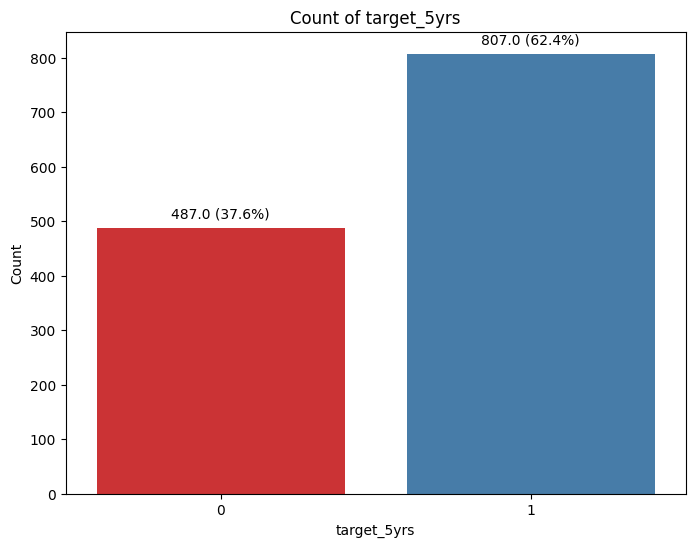

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=features, x='target_5yrs', palette='Set1')
plt.xlabel("target_5yrs")
plt.ylabel("Count")
plt.title("Count of target_5yrs")

# Calculate and display counts and percentages above the bars
total = len(features)

for p in ax.patches:
    
    height = p.get_height()
    ax.annotate(f'{height} ({height/total:.1%})', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

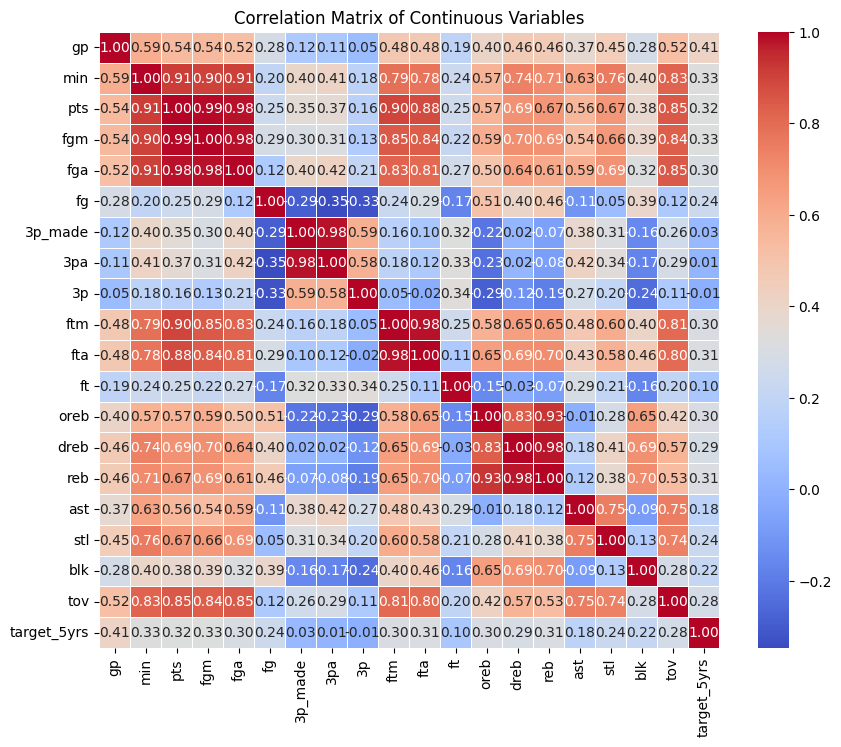

In [55]:

corr_matrix = features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

### Mutual Info

In [56]:
features = features.astype({
    'gp': 'int32',
    'min': 'int32',
    'pts': 'int32',
    'fgm': 'int32',
    'fga': 'int32',
    '3p_made': 'int32',
    '3pa': 'int32',
    'ftm': 'int32',
    'fta': 'int32',
    'oreb': 'int32',
    'dreb': 'int32',
    'reb': 'int32',
    'ast': 'int32',
    'stl': 'int32',
    'blk': 'int32',
    'tov': 'int32',
    'target_5yrs': 'int32'
})

In [58]:
X = features.drop(columns=['target_5yrs'])
y = features['target_5yrs']

In [59]:
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(X, y)

In [61]:
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi}).sort_values(by='Mutual Information', ascending=False)
print(mi_df)


    Feature  Mutual Information
10      fta            0.105174
0        gp            0.103895
12     oreb            0.067286
13     dreb            0.065005
4       fga            0.060319
2       pts            0.060040
3       fgm            0.057997
14      reb            0.056947
1       min            0.053489
9       ftm            0.044811
18      tov            0.036614
5        fg            0.035513
16      stl            0.022325
11       ft            0.022149
8        3p            0.000000
7       3pa            0.000000
6   3p_made            0.000000
15      ast            0.000000
17      blk            0.000000


Dropping non relavent data

In [63]:
X.drop(columns=[ '3pa', '3p'], inplace=True)

### Pre Processing

In [67]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((905, 16), (905,), (389, 16), (389,))

In [69]:
from sklearn.preprocessing import MinMaxScaler
x_train = MinMaxScaler().fit_transform(x_train)
x_test = MinMaxScaler().fit_transform(x_test)


array([[0.35211268, 0.13513514, 0.07142857, ..., 0.        , 0.        ,
        0.        ],
       [0.95774648, 0.62162162, 0.32142857, ..., 0.        , 0.        ,
        0.25      ],
       [0.47887324, 0.43243243, 0.21428571, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.85915493, 0.35135135, 0.21428571, ..., 0.        , 0.        ,
        0.25      ],
       [0.97183099, 0.78378378, 0.5       , ..., 0.5       , 0.        ,
        0.5       ],
       [1.        , 0.64864865, 0.32142857, ..., 0.        , 0.        ,
        0.25      ]])

### Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logistic_reg = LogisticRegression()

# Train the model
logistic_reg.fit(x_train, y_train)

# Predictions
y_pred = logistic_reg.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7223650385604113


### Random Forests

In [116]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [117]:
predictions = rf_classifier.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.68


### ROC Curves and Confusion Matrix

Training FOLD 1
AUC: 0.77000  Best Iteration: 7
Training FOLD 2
AUC: 0.73250  Best Iteration: 4
Training FOLD 3
AUC: 0.82933  Best Iteration: 28
Training FOLD 4
AUC: 0.68267  Best Iteration: 3
Training FOLD 5
AUC: 0.71467  Best Iteration: 6
Training FOLD 6
AUC: 0.62400  Best Iteration: 0
Training FOLD 7
AUC: 0.73867  Best Iteration: 3
Training FOLD 8
AUC: 0.66000  Best Iteration: 1
Training FOLD 9
AUC: 0.67733  Best Iteration: 6
Training FOLD 10
AUC: 0.81510  Best Iteration: 6


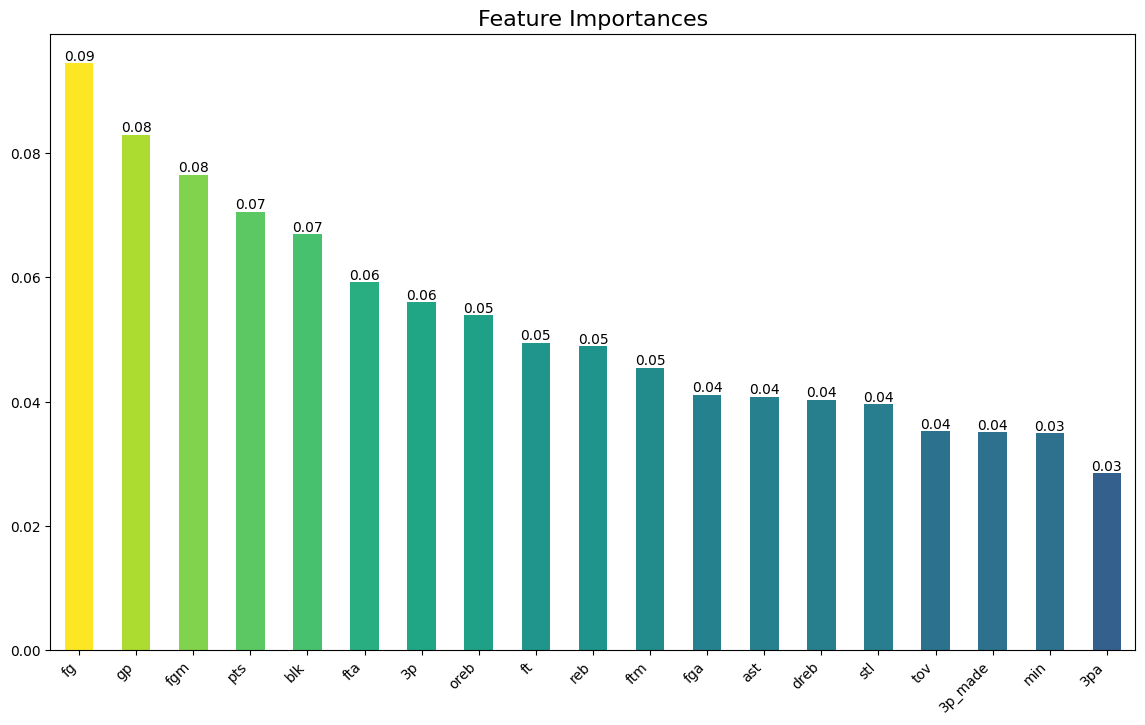

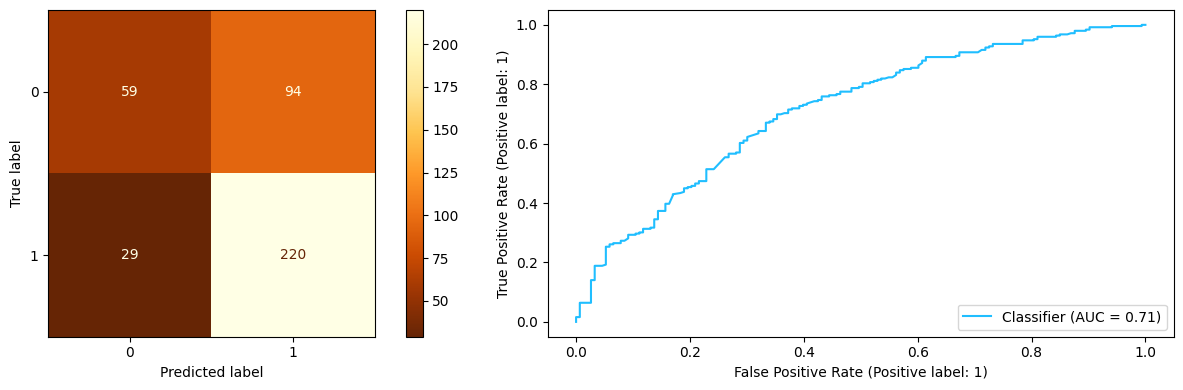

In [120]:

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

# Data preparation
FOLDS = 10
SEED = 1004
xgb_models = []
xgb_oof = []
f_imp = []

X = ds[['gp', 'min', 'pts', 'fgm', 'fga', 'fg', '3p_made', '3pa', '3p', 'ftm', 'fta', 'ft', 'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk', 'tov']]
y = ds['target_5yrs']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=101, stratify = y)  # Split the data into training and testing sets

skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=SEED)

# Function to plot feature importances
def plot_feature_importance(f_imp):
    feature_importance_df = pd.DataFrame(f_imp)
    avg_importance = feature_importance_df.mean()
    avg_importance = avg_importance.sort_values(ascending=False)
    # Adjust the figure size for better readability
    plt.figure(figsize=(14, 8))
    # Use a different color palette
    color_palette = 'viridis'
    # Create a bar plot with labels and color
    ax = avg_importance.plot(kind='bar', color=plt.matplotlib.colormaps.get_cmap(color_palette)(avg_importance / avg_importance.max()))
    plt.title('Feature Importances', size=16)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    # Add labels to the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                    fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
    plt.show()

# Function to show ROC curve and confusion matrix
def show_confusion_roc(oof_results):
    f, ax = plt.subplots(1, 2, figsize=(13.3, 4))
    df = pd.DataFrame(np.concatenate(oof_results), columns=['id', 'preds', 'target']).set_index('id')
    df.index = df.index.astype(int)
    cm = confusion_matrix(df.target, df.preds.ge(0.5).astype(int))
    cm_display = ConfusionMatrixDisplay(cm).plot(cmap='YlOrBr_r', ax=ax[0])
    ax[0].grid(False)
    RocCurveDisplay.from_predictions(df.target, df.preds, color='#20BEFF', ax=ax[1])
    plt.tight_layout()

# Model training and evaluation
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
    print(f'Training FOLD {fold + 1}')
    
    X_train_fold, y_train_fold = X_train.iloc[train_idx], y_train.iloc[train_idx]
    X_valid_fold, y_valid_fold = X_train.iloc[val_idx], y_train.iloc[val_idx]

    # XGBoost model
    model = XGBClassifier(n_estimators=1000, n_jobs=-1, max_depth=5, eta=0.2, colsample_bytree=0.67, early_stopping_rounds=300)
    model.fit(X_train_fold, y_train_fold, eval_set=[(X_train_fold, y_train_fold), (X_valid_fold, y_valid_fold)], verbose=0)

    val_preds = model.predict_proba(X_valid_fold)[:, 1]
    val_score = roc_auc_score(y_valid_fold, val_preds)
    best_iter = model.best_iteration

    idx_pred_target = pd.DataFrame({'id': val_idx, 'preds': val_preds, 'target': y_valid_fold})
    f_imp.append({i: j for i, j in zip(X.columns, model.feature_importances_)})
    print(f'AUC: {val_score:.5f}  Best Iteration: {best_iter}')

    xgb_oof.append(idx_pred_target)
    xgb_models.append(model)

# Plot feature importances
plot_feature_importance(f_imp)

# Plot ROC curve and confusion matrix
show_confusion_roc(xgb_oof)